# Imports and data

In [118]:
import argparse
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from utils import *
from classifiers import *
from preprocess import  preprocess
import matplotlib.pyplot as plt
import math


In [119]:
seed = 42
random.seed(seed)
raw = pd.read_csv('C:/Users/jordi/Documents/GitHub/MUD_Labs_Git/LangDetect/data/dataset.csv')
voc_size = 1

# Split

In [120]:
# list with all the languages (unique)
languages = set(raw['language']) 

# Split Train and Test sets
X=raw['Text']
y=raw['language']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


In [41]:
# save the raw test set to check bad labaled data
x_test_raw_2 = X_test

In [42]:
# Plot of the distribution of the languages in the dataset
# raw['language'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(10, 10))

# Procesar words

In [43]:
# Preprocess text (Word granularity only)
analyzer = 'char'
if analyzer == 'word':
    X_train, y_train = preprocess(X_train,y_train)
    X_test, y_test = preprocess(X_test,y_test)

# Vectorize the text

In [121]:
# Vectorize the text
unigramVectorizer = CountVectorizer(analyzer=analyzer,max_features=1000)
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
X_unigram_test_raw = unigramVectorizer.transform(X_test)
unigramFeatures = unigramVectorizer.get_feature_names()
print('length of the vector:' + str(len(unigramFeatures)))

# change variables names
features = unigramFeatures      # features names
X_train_raw = X_unigram_train_raw
X_test_raw = X_unigram_test_raw

# for i in X_unigram_train_raw.toarray():
#     print(i)

length of the vector:1000


c:\Users\jordi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
# # Uni- & Bi-Gram Mixture CountVectorizer for top 1% features
# top1PrecentMixtureVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1), min_df=1e-2)
# X_top1Percent_train_raw = top1PrecentMixtureVectorizer.fit_transform(X_train)
# X_top1Percent_test_raw = top1PrecentMixtureVectorizer.transform(X_test)

In [36]:
print('========')
print('Number of tokens in the vocabulary:', len(features))
print('Coverage: ', compute_coverage(features, X_test.values, analyzer=analyzer))
print('========')

Number of tokens in the vocabulary: 1000
Coverage:  0.9808517331929401


In [20]:
# coverage_plot_2 = []

# for i in range(1,10000,300):
#     voc_size = i
#     #Compute text features
#     analyzer = 'word'
#     unigramVectorizer = CountVectorizer(analyzer=analyzer,max_features=voc_size)
#     X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
#     X_unigram_test_raw = unigramVectorizer.transform(X_test)
#     unigramFeatures = unigramVectorizer.get_feature_names()

#     coverage_plot_2.append(compute_coverage(unigramFeatures, X_test.values, analyzer=analyzer))

#     print(str(i))
#     print(coverage_plot_2[-1])


In [21]:
# coverage_plot = [15.194378278428026, 93.67813140035825, 96.66568220194796, 97.83914274524406, 98.46031858134354, 98.86782277066895, 99.1482026028391, 99.34261298337753, 99.49779458501602, 99.61612296392364, 99.69888220451612, 99.76385687595103, 99.8125878795272, 99.85123882044006, 99.87852561427388, 99.90041925356174, 99.91968051979737, 99.93162250486347, 99.94272983505935, 99.9492144613587, 99.9535803483721, 99.95884509447652, 99.96333938993149, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233, 99.96667800941233]
# coverage_plot_2  = [1.7058206150412556, 19.321156406990877, 22.84397466159456, 25.195700601932323, 26.95462069137175, 28.404070406584335, 29.59009694802474, 30.620558623064255, 31.679644233521532, 32.63211605553873, 33.46096566372269, 34.21970737211531, 34.920786370028665, 35.51691093807688, 36.17484661304173, 36.72948721671638, 37.30777368008396, 37.78732830824245, 38.28057264464421, 38.72320654451022, 39.1737223976072, 39.604325947804874, 40.007550081515994, 40.355185702966516, 40.70862907942935, 41.06414665411086, 41.4084635584115, 41.77144824668025, 42.11535031133715, 42.44016975238222, 42.72516458762865, 43.00767038501267, 43.28685746524681, 43.53617609113197]

# # plot the coverage of the vocabulary
# plt.plot(range(1,10000,300),coverage_plot[:], '-r', label = 'Unigrams')
# plt.plot(range(1,10000,300),coverage_plot_2[:], '-g', label = 'Words')
# # plt.axvline(x = 1000, color = 'b', label = 'axvline - full height')
# plt.xlabel('Vocabulary size')
# plt.ylabel('% Coverage')
# plt.grid()
# plt.title('Coverage of the vocabulary')
# plt.legend()
# plt.show()

# Significance per language

In [22]:
# Aggregate Unigrams per language   (funcio agafada del kaggle)
def train_lang_dict(X_raw_counts, y_train):
    '''Returns a dictionary with the relative frequency of each feature per language.'''

    lang_dict = {}
    for i in range(len(y_train)):
        lang = y_train[i]
        v = np.array(X_raw_counts[i])
        if not lang in lang_dict:
            lang_dict[lang] = v
        else:
            lang_dict[lang] += v
            
    # to relative
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)
        
    return lang_dict

# Collect relevant chars per language  (funcio agafada del kaggle i modificada)
def getRelevantCharsPerLanguage(features, language_dict, significance=1e-5):
    relevantCharsPerLanguage = {}
    relevantCharsPerLanguage_w_significance = {}

    for lang in languages:
        chars = []
        significance_chars = {}
        relevantCharsPerLanguage[lang] = chars
        relevantCharsPerLanguage_w_significance[lang] = significance_chars
        v = language_dict[lang]
        for i in range(len(v)):
            if v[i] > significance:
                chars.append(features[i])
                significance_chars[features[i]] = v[i]
    return relevantCharsPerLanguage, relevantCharsPerLanguage_w_significance

language_dict_unigram = train_lang_dict(X_unigram_train_raw.toarray(), y_train.values)

relevantCharsPerLanguage, relevantCharsPerLanguage_significance = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram)

# Convert to dic
languages_num_ngrams = {}
for lang in languages:    
    languages_num_ngrams[lang] = len(relevantCharsPerLanguage[lang])

# Order a dictionary by value
def sortDictByValue(d):
    return {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

languages_num_ngrams = sortDictByValue(languages_num_ngrams)

languages_num_ngrams

# plot an histogram with the number of unigrams per language
# plt.bar(languages_num_ngrams.keys(), languages_num_ngrams.values(), color='g')
# plt.show()

{'Dutch': 49,
 'English': 50,
 'Spanish': 55,
 'Portugese': 58,
 'French': 58,
 'Indonesian': 67,
 'Swedish': 68,
 'Russian': 74,
 'Estonian': 82,
 'Romanian': 85,
 'Arabic': 85,
 'Persian': 87,
 'Turkish': 87,
 'Latin': 89,
 'Tamil': 96,
 'Hindi': 101,
 'Urdu': 109,
 'Pushto': 127,
 'Thai': 128,
 'Chinese': 433,
 'Japanese': 485,
 'Korean': 507}

In [23]:
# get most common chars for a few European languages
europeanLanguages = ['Dutch', 'English', 'Latin', 'Indonesian', 'Estonian', 'Pushto', 'Spanish', 'French', 'Chinese', 'Urdu', 'Turkish', 'Persian']
europeanLanguages = ['Dutch', 'English', 'Latin', 'Indonesian', 'Estonian', 'Pushto', 'Spanish', 'French', 'Chinese', 'Urdu', 'Turkish', 'Persian']

relevantChars_OnePercent = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram, 1e-2)


# collect and sort chars
europeanCharacters = []
for lang in europeanLanguages:
    europeanCharacters += relevantChars_OnePercent[lang]
europeanCharacters = list(set(europeanCharacters))
europeanCharacters.sort()

# build data
indices = [unigramFeatures.index(f) for f in europeanCharacters]
data = []
for lang in europeanLanguages:
    data.append(language_dict_unigram[lang][indices])

#build dataframe
df = pd.DataFrame(np.array(data).T, columns=europeanLanguages, index=europeanCharacters)
df.index.name = 'Characters'
df.columns.name = 'Languages'

# plot heatmap
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=0.8) # for label size
sn.set(rc={'figure.figsize':(10, 10)})
sn.heatmap(df, cmap="Greens", annot=True, annot_kws={"size": 8}, fmt='.0%')# font size
plt.show()

TypeError: tuple indices must be integers or slices, not str

In [46]:
# Plots de significancia de los unigramas por idioma
for i in relevantCharsPerLanguage_significance.keys():
    relevantCharsPerLanguage_significance[i] = {k: v for k, v in sorted(relevantCharsPerLanguage_significance[i].items(), key=lambda item: item[1], reverse=True)}


# for i in relevantCharsPerLanguage_significance.keys():
#     # add title
#     plt.xlabel("Unigrams")
#     plt.ylabel("Significance")
#     plt.title(i)
#     plt.plot(relevantCharsPerLanguage_significance[i].keys(), relevantCharsPerLanguage_significance[i].values(), color='b')
#     plt.savefig('C:/Users/jordi/Documents/GitHub/MUD_Labs_Git/LangDetect/figures/'+i+'.jpg')
#     # plt.show()
#     # save figure


# Normalize and Classifier

In [122]:
X_train, X_test = normalizeData(X_train_raw, X_test_raw)

In [64]:
#Apply Classifier  
y_predict = applyNaiveBayes(X_train, y_train, X_test)

print('========')
print('Prediction Results:')    
plot_F_Scores(y_test, y_predict)
print('========')

Prediction Results:
F1: 0.9552272727272727 (micro), 0.9578334706797794 (macro), 0.9574109803676452 (weighted)


# Analize results of the classifier

In [25]:
# detect wrong predicted data
for i in range(len(y_predict)):
    if y_test.iloc[i] != y_predict[i] and (y_test.iloc[i] == 'Urdu' and y_predict[i] == 'English') or (y_test.iloc[i] == 'English' and y_predict[i] == 'Urdu'):
        print('Predicted: ', y_predict[i], ' Actual: ', y_test.iloc[i], ' Text: ', x_test_raw_2.iloc[i])
        print('')

Predicted:  English  Actual:  Urdu  Text:  below was the list of the types of sports played in the seag from  the bullet mark • indicates that the sport was played in the respective year

Predicted:  English  Actual:  Urdu  Text:  singh amar kaur jasbir gandhi and civil disobedience documents in the india office records - london india office library and records 

Predicted:  English  Actual:  Urdu  Text:  "تاریخی اعتبار سے the conquest destroyed the outward form of what had already inwardly decayed it cleared away with regrettable brutality and thoroughness a system of life which with all its gifts of order culture and law had worn itself into senile debility and had lost the powers of regeneration and growth" ص۔ 

Predicted:  English  Actual:  Urdu  Text:  guidelines for the screening care and treatment of persons with hepatitis c infection۔ world health organization۔ april ۔ آئی ایس بی این     ۔



In [ ]:
# plot confusion matrix
plot_Confusion_Matrix(y_test, y_predict, "Blues") 

# PCA analize

PCA and Explained Variance:
Variance explained by PCA: [0.3131436  0.13806745 0.07295064 0.06303367 0.0589914  0.04427856
 0.02937659 0.02257313 0.01862165 0.01606183 0.01184065 0.0089064
 0.00780094 0.00707305 0.00596901 0.00554958 0.00470758 0.00434793
 0.00391832 0.00384493 0.00374775 0.00365648 0.00301895 0.00295424
 0.0025706  0.00245818 0.00232096 0.00230949 0.00217881 0.00206411
 0.00176801 0.00159564 0.00155497 0.00148184 0.00145428 0.00142636
 0.00137152 0.00133157 0.00132028 0.00122418 0.00118096 0.00117238
 0.0011336  0.00102244 0.00101607 0.00100875 0.00099635 0.00098886
 0.00094755 0.00088561 0.00085973 0.0008468  0.00084088 0.00083161
 0.00081973 0.00080138 0.00078466 0.00078271 0.00077008 0.00074685
 0.00074088 0.00072798 0.0007062  0.0006841  0.00067633 0.00067237
 0.00066704 0.00066468 0.00065743 0.00064779 0.0006268  0.00061888
 0.00061833 0.00060336 0.00059067 0.00058506 0.00058127 0.00056896
 0.00055472 0.00054486 0.00053948 0.0005338  0.00053256 0.00052371
 0.00050

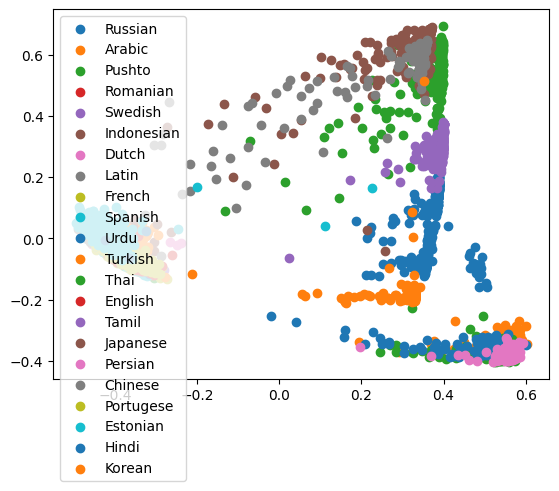

In [123]:
#Plot PCA
print('========')
print('PCA and Explained Variance:') 
# plotPCA(X_train, X_test,y_test, languages) 

pca = PCA(n_components=100)
pca.fit(toNumpyArray(X_train))
pca_test = pca.transform(toNumpyArray(X_test))
pca_train = pca.transform(toNumpyArray(X_train))

print('Variance explained by PCA:', pca.explained_variance_ratio_)

y_test_list = np.asarray(y_test.tolist())
for lang in languages:
    pca_x = np.asarray([i[0] for i in pca_test])[y_test_list == lang]
    pca_y = np.asarray([i[1] for i in pca_test])[y_test_list == lang]
    plt.scatter(pca_x,pca_y, label=lang)
plt.legend(loc="upper left")
plt.show()

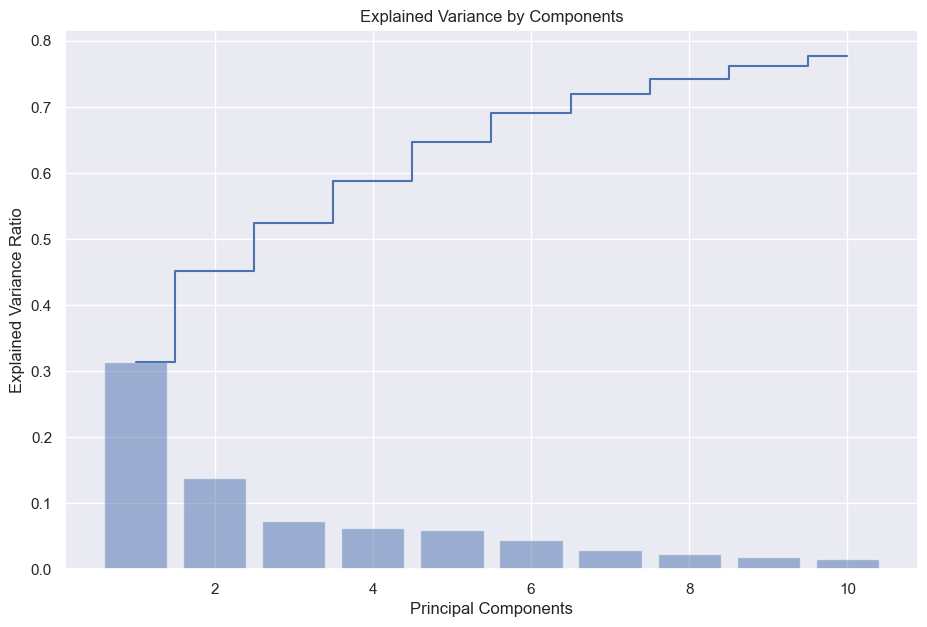

In [71]:
# get explained variance ratio
exp_var = pca.explained_variance_ratio_

# plot explained variance ratio
plt.figure(figsize=(11, 7))
plt.bar(range(1, 11), exp_var, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(exp_var), where='mid')
plt.title('Explained Variance by Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


# PCA classifier

In [124]:
X_train, X_test = normalizeData(pca_train, pca_test)
#Apply Classifier  
clf = MultinomialNB()
clf.fit(X_train + 1, y_train)
y_predict = clf.predict(X_test + 1)

print('========')
print('Prediction Results:')    
plot_F_Scores(y_test, y_predict)
print('========')

Prediction Results:
F1: 0.9181818181818182 (micro), 0.9187141462904691 (macro), 0.9186935561524091 (weighted)


# Plots performance of different models

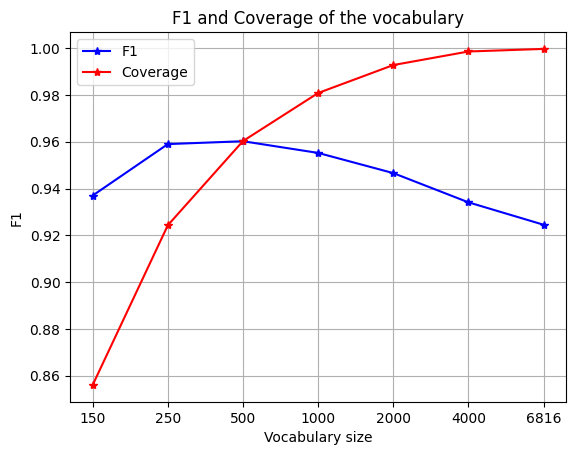

In [101]:
unigrams_plot_f1 = {'150':0.937, '250': 0.959,'500': 0.96022,'1000':0.95522,'2000':0.94659,'4000': 0.93409,'6816': 0.9245}
unigrams_plot_coverage = {'150':0.8560, '250': 0.9243, '500': 0.9603, '1000': 0.98085, '2000':0.9928, '4000': 0.9986, '6816': 0.9997}

plt.plot(unigrams_plot_f1.keys(), unigrams_plot_f1.values(), '-*b', label='F1')
plt.plot(unigrams_plot_coverage.keys(), unigrams_plot_coverage.values(), '-*r', label='Coverage')
plt.xlabel('Vocabulary size')
plt.ylabel('F1')
plt.title('F1 and Coverage of the vocabulary')
plt.legend()
plt.grid()
plt.show()